In [1]:
import numpy as np
from DumbTruck import DumbTruck
from kalmanfilter import KalmanFilter

In [27]:
#Set up the data generation
t = 100
dt = 0.02
k = 0.1
ep = 0.01
nu = 0.01

gen = DumbTruck()
initial = np.array([[0],[0]])
process = gen.process(initial, t=t, dt=dt, k=k, ep=ep)
measure = gen.measure(process, nu=nu)

In [15]:
#Inspect our outputs to make sure they are correct
process

array([[ 0.00000000e+00,  0.00000000e+00, -4.24420522e-03,
        -2.77898256e-03, -8.97523966e-03, -2.87243238e-02,
        -6.33906787e-02, -8.22537372e-02, -9.71776142e-02,
        -1.01118697e-01, -1.01007391e-01, -1.02323253e-01,
        -9.18733777e-02, -7.91345269e-02, -6.95624005e-02,
        -5.34650897e-02, -3.93772564e-02, -2.63342208e-02,
        -3.30416898e-02, -2.74886791e-02, -1.17734993e-02,
         8.76996316e-03,  3.09888169e-02,  3.28328578e-02,
         4.56924707e-03, -2.43087720e-02, -5.43312500e-02,
        -8.47864518e-02, -1.15584760e-01, -1.26851394e-01,
        -1.48632238e-01, -1.88923527e-01, -2.27234280e-01,
        -2.43579794e-01, -2.71053707e-01, -2.86098346e-01,
        -2.91460665e-01, -2.93845074e-01, -2.98130865e-01,
        -3.01575885e-01, -3.19007456e-01, -3.25204833e-01,
        -3.36236614e-01, -3.59862295e-01, -3.80409200e-01,
        -4.00701452e-01, -4.21715901e-01, -4.31829925e-01,
        -4.42926179e-01, -4.42939035e-01, -4.43089776e-0

In [16]:
measure

array([[-7.21843958e-03, -2.75681559e-03,  7.79922371e-03,
         5.09743360e-03, -3.86135809e-03, -2.97090022e-02,
        -6.14473175e-02, -9.00185700e-02, -8.72045027e-02,
        -9.87939452e-02, -1.03319924e-01, -9.31073910e-02,
        -9.21014711e-02, -8.68533100e-02, -5.53349838e-02,
        -5.81247920e-02, -2.49648361e-02, -1.28368635e-02,
        -4.13102712e-02, -3.22164489e-02,  2.58679240e-03,
         7.53363562e-03,  3.60498988e-02,  2.62740930e-02,
         4.51403094e-03, -2.56085093e-02, -5.69846036e-02,
        -8.69847553e-02, -1.25423402e-01, -1.28582931e-01,
        -1.64018968e-01, -2.06175609e-01, -2.44709093e-01,
        -2.49051725e-01, -2.86127506e-01, -2.95240611e-01,
        -2.81365770e-01, -2.93920841e-01, -3.09778955e-01,
        -2.94423061e-01, -3.02971271e-01, -3.19504017e-01,
        -3.19491910e-01, -3.49992826e-01, -3.70836097e-01,
        -3.97006640e-01, -4.24509753e-01, -4.34154027e-01,
        -4.46542501e-01, -4.66861313e-01, -4.40669225e-0

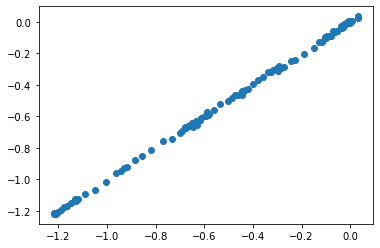

In [17]:
#Plotting only - I use mpl but you can use something else
import matplotlib.pyplot as plt
plt.scatter(process[0], measure[0])

#Not a ton of noise

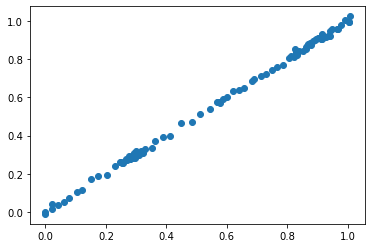

In [18]:
#Trying more measurement noise this time
process = gen.process(initial, t=t, dt=dt, k=k, ep=ep)
measure = gen.measure(process, nu=nu)
plt.scatter(process[0], measure[0])


Text(0, 0.5, 'Position')

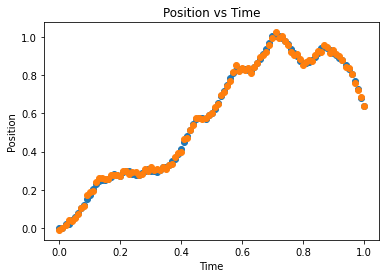

In [20]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[0])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[0])
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Velocity')

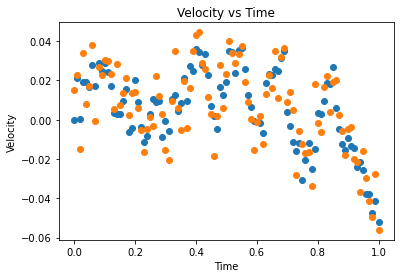

In [21]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[1])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[1])
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

In [22]:
output = np.array([[], []])
filter = KalmanFilter(dt, k, ep, nu, nu)
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (2,1)
    filter.predict(measure_t)
    kalman_output = filter.get_current_guess()
    output = np.append(output, kalman_output, axis=1)

In [23]:
measure.shape

(2, 101)

Text(0, 0.5, 'Position')

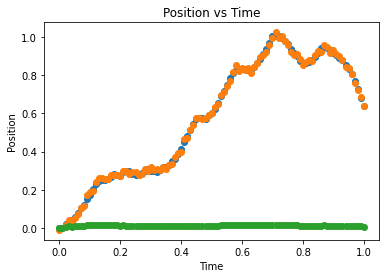

In [25]:
plt.scatter(np.arange(0, (t + 1) * dt,dt), process[0])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[0])
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[0])
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Velocity')

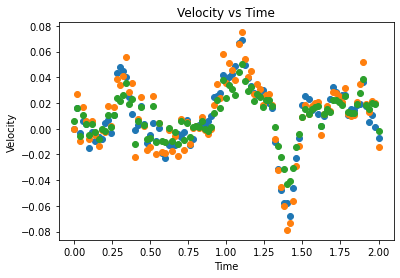

In [12]:
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), process[1])
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), measure[1])
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), output[1])
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

In [26]:
output

array([[-1.46910612e-03,  1.08312390e-03,  3.93499975e-03,
         9.64714361e-03,  6.71694774e-03,  8.18295806e-03,
         9.99813875e-03,  1.19962343e-02,  1.21518055e-02,
         1.64976769e-02,  1.66310847e-02,  1.54092905e-02,
         1.77580488e-02,  1.80123723e-02,  1.71198351e-02,
         1.55225593e-02,  1.48155094e-02,  1.50232865e-02,
         1.43597786e-02,  1.35809716e-02,  1.29266246e-02,
         1.35118849e-02,  1.27658937e-02,  1.16639566e-02,
         1.15953935e-02,  1.11811400e-02,  1.02107225e-02,
         1.02810428e-02,  1.07497127e-02,  1.00970161e-02,
         1.03072944e-02,  9.53828344e-03,  9.52020364e-03,
         9.25223127e-03,  9.30258479e-03,  8.80295433e-03,
         9.28597356e-03,  9.06950382e-03,  9.95583008e-03,
         1.02866573e-02,  1.02930519e-02,  1.16528199e-02,
         1.16004645e-02,  1.23447337e-02,  1.26719519e-02,
         1.32039591e-02,  1.28946266e-02,  1.25870414e-02,
         1.26308882e-02,  1.26800641e-02,  1.26531006e-0